In [ ]:
"""
Problem 2.2
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# The load_dataset function takes a csv file as argument and returns the data set array, 
# the unique class labels and the number of features:
def load_dataset(filename):
    
    # loads data set in the dataset array
    dataset = np.genfromtxt(filename, dtype='float', delimiter=',')
    dataset = np.array(dataset)
    
    # array with the unique class labels
    class_labels = np.unique(dataset[:, -1])

    return dataset, class_labels, len(dataset[0,:-1])

"""
Finds the mean and the covariance matrices(diagonal, with all diagonal elements equal) for Question (a)
Parameters:
-data_set: The splitted dataset
Returns:
-mean: The mean vector
-covar_matrix: The covariance matrix
"""
def mean_var_a(data_set):
    mean = np.mean(data_set,axis=0)

    dif = (data_set - mean)
    var = np.sum(np.dot(dif.T, dif)) / (data_set.shape[1] * data_set.shape[0])

    covar_matrix = var*np.identity(len(data_set[0]))

    return mean, covar_matrix

"""
Finds the mean and the covariance matrices (non-diagonal).
Means and covariance matrices of the pdfs are estimated using Maximum Likelihood 
from the available data. For Question (b)
Parameters:
-data_set: The splitted dataset
Returns:
-mean: The mean vector
-covar_matrix: The covariance matrix
"""
def mean_var_b(data_set):
    mean = np.mean(data_set,axis=0)
    
    dif = (data_set - mean)
    covar_matrix = np.dot(dif.T, dif) / data_set.shape[0]

    return mean, covar_matrix


"""
Finds the mean and the covariance matrices.
Components of the feature vectors are mutually statistically independent
Marginal Pdfs are gaussian, with parameters (mean, variance) estimated using Maximum Likelihood 
from the available data. For Question (c)
Parameters:
-data_set: The splitted dataset
Returns:
-mean: The mean vector
-covar_matrix: The covariance matrix
"""
def mean_var_c(data_set):
    mean = np.mean(data_set,axis=0)

    dif = (data_set - mean)

    var = np.var(data_set,axis=0)
    covar_matrix = var*np.identity(len(data_set[0]))

    return mean, covar_matrix

"""
Finds the mean and the covariance matrices.
Components of the feature vectors are mutually statistically independent
Marginal Pdfs are gaussian, with parameters (mean, variance) estimated using Maximum Likelihood 
from the available data. For Question (c)
Parameters:
-data_set: The splitted dataset
-x: A row of the data_set
Returns:
-parz: A probability
"""
def parzen(data_set,x): 
    
    # Number of rows
    N = len(data_set)
    
    h=np.sqrt(N)

    # Calculates the pd for all points of data_set, for each dimension separately, using as mean the x 
    # and as variance the h^2:
    p = gaussian(data_set, x, h**2, 1)

    # Sums the pd's over all points of the data_set
    parz = np.sum(p,axis=0)/N
    
    # Multiplies the pd's of all the dimensions together to get the final pd of x
    parz = np.prod(parz)

    return parz


"""
The gaussian function calculates the pd for all points of a data set, for each dimension separately.
Parameters:
-dataset
-mean: Mean vector
-var: Covariance matrix
-dimension: If dimensions = 1 then implement for 1D Parzen
Results:
-prob: Probability
"""

def gaussian(dataset, mean = None, var = None, dimension = None):
    # calculates the pd for univariate gaussian distribution:
    if dimension == 1:
        nom = np.exp((-(dataset-mean)**2)/(2*var))
        denom = (2 * np.pi * var)**0.5 
        prob = nom / denom
    
    # calculates the pd for multivariate gaussian distribution:
    else:
        num_params = len(mean)
        nom = np.exp( -0.5 * (((dataset - mean) @ np.linalg.inv(var)) @ (dataset - mean).T))
        denom = ((2* np.pi) ** (num_params/2)) * (np.linalg.det(var) ** 0.5)
        prob = nom / denom     
        
    return prob

# The plot_aic_bic function takes the AIC and BIC scores of a specific class, calculated for Questions A, B, C, D,
# plots them in the same plot and saves them as a png file:
def plot_aic_bic(aics, bics, class_label):
    assumptions = ["A", "B", "C", "D"]
    aics_bics = np.vstack((aics, bics))
    y = aics_bics.T
    df = pd.DataFrame(y, columns=["AIC", "BIC"])
    df.insert(1, "Assumptions", assumptions, True)
    df.plot(x="Assumptions", y=["AIC", "BIC"], kind="bar", rot=0)

    if class_label == 0:
        plt.savefig("2_2_a.png")
    else:
        plt.savefig("2_2_b.png")

      
    plt.show()

In [ ]:
# The gof function calculates the AIC and BIC scores:
def gof(data_set, k, mean= None, var = None, dimension = None):
    log_th = 0
    
    # for Questions A, B, C with the respective mean and var:
    if dimension != 1:
        for row in data_set:
            # calls the gaussian function
            p_x = gaussian(row, mean, var)
            log_th += np.log(p_x)

    # for Question D:
    else:
        for row in data_set:
            #calls d function
            log_th += np.log(parzen(data_set, row)) 
    
    # calculates the AIC score
    aic = -2 * log_th + k * 2
    # calculates the BIC score
    bic = -2 * log_th + k * np.log(data_set.shape[0])

    return aic, bic

In [ ]:
# loads the PIMA INDIANS DIABETES DATABASE
dataset, classes_labels, num_parameters = load_dataset('pima-indians-diabetes.data')

Results for Class 0:
ASSUMPTION A: AIC = 40515.922320172955 and BIC = 40553.853793058755
ASSUMPTION B: AIC = 28576.82331525886 and BIC = 28762.266071589434
ASSUMPTION C: AIC = 29221.34727233397 and BIC = 29288.781001908723
ASSUMPTION D: AIC = 35440.99975100932 and BIC = 35445.21435910775


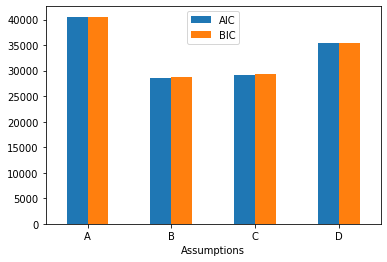

Results for Class 1:
ASSUMPTION A: AIC = 23053.769172013224 and BIC = 23086.088054837823
ASSUMPTION B: AIC = 16111.863890855151 and BIC = 16269.867317997629
ASSUMPTION C: AIC = 16316.767199082524 and BIC = 16374.222990770697
ASSUMPTION D: AIC = 18416.273162215195 and BIC = 18419.864149195706


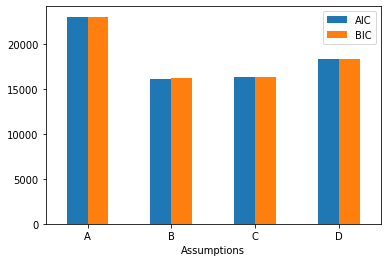

In [ ]:
# initialization of aics list
aics = []
# initialization of bics list
bics = []

# Repeats the following for each class label separately:
for label in classes_labels:
    #Split dataset based on the class label
    split_dataset = dataset[dataset[:,-1]==int(label),:-1]
    print('Results for Class', str(int(label)) + ":")

    #Get the pdf parameters for the parametric problems
    mean_a, covar_a = mean_var_a(split_dataset)
    mean_b, covar_b = mean_var_b(split_dataset)
    mean_c, covar_c = mean_var_c(split_dataset)


    #Question A
    #the number of estimated parameters in the candidate model
    k_param = len(mean_a) + 1 #parameters of the mean vector plus the variance
    aic, bic = gof(split_dataset, k_param, mean_a, covar_a)
    aics.append(aic)
    bics.append(bic)
    print("ASSUMPTION A: AIC = %s and BIC = %s" % (aic, bic))

    #Question B
    k_param = len(mean_b) + covar_b.shape[0] * (covar_b.shape[1] + 1) / 2 #parameters of the mean vector plus the parameters of the covariance matrix which is symmetric
    aic, bic = gof(split_dataset, k_param, mean_b, covar_b)
    aics.append(aic)
    bics.append(bic)
    print("ASSUMPTION B: AIC = %s and BIC = %s" % (aic, bic))

    #Question C
    k_param = len(mean_c) + covar_c.shape[0] #parameters of the mean vector plus the parameters the diagonal covariance matrix
    aic, bic = gof(split_dataset, k_param, mean_c, covar_c)
    aics.append(aic)
    bics.append(bic)
    print("ASSUMPTION C: AIC = %s and BIC = %s" % (aic, bic))

    #Question D
    #Non parametric problem
    k_param = 1 #The h parameter. We did not consider the mean vector and the variance of the pdf as estimated parameters in the model because they are derived from the dataset.
    aic, bic = gof(split_dataset, k_param, dimension = 1)
    aics.append(aic)
    bics.append(bic)
    print("ASSUMPTION D: AIC = %s and BIC = %s" % (aic, bic))
    
    plot_aic_bic(aics, bics, int(label))

    aics = []
    bics = []